# **Soal Praktikum 8 MA2151 Sikomat 2020**

## 1 (Mager Bikin Judul)

Terserah mau dengerin yang mana:

https://www.youtube.com/watch?v=Vi_asBY5UX8

https://www.youtube.com/watch?v=mTp-OxfkCao

Anda mager baca narasi praktikum? Sama, saya juga mager nulis narasi praktikum ini. Tapi ya sudah lah.

Jadi gini aja - misalkan X tahun kemudian, ternyata ada penelitian yang menyatakan bahwa mager bisa menular dari badan ke badan. Teknisnya bagaimana, entahlah - saya terlalu mager untuk menjelaskan. Intinya ya, Anda mencoba mensimulasikan bahaya mager dengan mensimulasikan pergerakan orang di daerah yang telah terjangkit kemageran. Yha anggap aja automata, cuman lebih sederhana. [mau yang tidak sederhana? Tuh, tugas 2 Sikomat].

TL;DRnya bagaimana?
<ol type="a">
<li> Buatlah array 12x12 dengan seluruh entrinya nol (sebagai representasi lingkungan) lalu, buatlah array 3x6 (yang merepresentasikan enam orang) dengan aturan berikut: baris pertama koordinat x, kedua y, ketiga kondisi manusia (1 jika terjangkit, 0 jika tidak). Misal yang sakit hanya orang pertama, dengan koordinat (x,y) dengan xy dua digit terakhir NIM Anda 
<li> Gambar kondisi awal
<li> Simulasikan automata dengan syarat seperti di atas
</ol>
<br>

Untuk membantu dalam pemodelan, silahkan gunakan beberapa spesifikasi dibawah:
    
    * Seseorang hanya bisa bergerak 4 mata angin (Utara, Timur, Selatan, Barat)
    * Asumsikan tidak ada kematian selama simulasi
    * Asumsikan tidak ada orang yang sembuh selama simulasi
    * Tidak ada orang yang keluar masuk lingkungan
    * Jika seseorang bersebelahan dengan orang yang terjangkit kemageran, ada 80% kemungkinan untuk tertular
    * Definisi bersebelahan adalah berada di arah (Utara, Timur Laut, Timur, Tenggara, Selatan, Barat Daya, Barat, dan Barat Laut)
    * Bedakan warna untuk latar belakang, orang terjangkit, dan orang belum terjangkit

Catatan: Untuk mempermudah praktikan dan mempercepat program, jika seseorang gagal untuk bergerak maka pada iterasi itu orang tersebut tidak perlu bergerak.
    
Ohya, sedikit bocoran: Setelah ujicoba, anggap saja nomor 1-4 persentasenya lebih gede daripada animasiin - serius, kemungkinan waktunya tidak cukup.


**Soal:**
1. Buatlah array 12x12 dan 3x6 sesuai syarat di atas, sebagai kondisi awal.

In [1]:
# Jawaban No 1
import numpy as np

# agar hasil eksperimen yang sama dapat dihasilkan
# oleh orang lain
np.random.seed(0)


# matriks sebagai representasi lingkungan, bernilai
#   0 sebagai penanda lokasi kosong
#   1 jika ditempati orang sehat (belum terjangkit)
#   2 jika ditempati orang sakit (terjangkit)
# orang tidak dapat melewati batas lingkungan
# baris matriks L[x, ] didefinisikan searah sumbu x positif
#   sumbu x positif didefinisikan searah Timur
# kolom matriks L[, y] didefinisikan sejajar sumbu y positif
#   sumbu y positif didefinisikan searah Utara
L = np.zeros((12, 12), dtype=int)

# matriks representasi state orang (manusia)
# dengan kolom ke-i sebagai state orang_i
# dan baris:
#   pertama sebagai koordinat sumbu x
#   kedua sebagai koordinat sumbu y
#   ketiga bernilai 1 jika sehat, 2 jika sakit
M = np.zeros((3, 6), dtype=int)


# ============== mengisi state manusia =================
#   untuk orang_0 dipilih NIM = 10110820
M[0, 0], M[1, 0], M[2, 0] = 0, 2, 2

# untuk orang lainnya dibuat fungsi yang mempersingkat kode
def is_position_valid(i, x, y):
    '''mengecek apakah orang_i dapat menempati (x, y)
    Asumsi: (-1 < x < 12) dan (-1 < y < 12)'''

    # cek apakah (x, y) masih didalam batas lingkungan
    if not ((-1 < x < 12) and (-1 < y < 12)):
        return False
    
    # cek apakah ada orang_j dengan koordinat yang sama
    for j in range(6):
        if j!=i and (x == M[0,j]) and (y == M[1, j]):
            return False

    return True


# mengisi state orang_1 sampai orang_6 (semua didefinisikan sehat)
for i in range(1, 6):
    # memilih koordinat
    x, y = np.random.choice(12, 2)
    
    # looping untuk memastikan koordinat valid bagi orang_i
    while not is_position_valid(i, x, y):
        x, y = np.random.choice(12, 2)
    
    # simpan state orang ke matriks M
    M[0, i], M[1, i] = x, y
    M[2, i] = 1


# ======== mengisi representasi lingkungan ============
# dibuat fungsi yang mempersingkat kode (nantinya)
def create_lingkungan(M):
    '''menghasilkan representasi lingkungan dari matriks M'''

    new_L = np.zeros((12, 12), dtype=int)
    for i in range(6):
        x, y, state = M[0, i], M[1, i], M[2, i]
        new_L[x, y] = state
    return new_L

# buat representasi lingkungan
L = create_lingkungan(M)

In [2]:
print("matriks L\n", L)
print()
print("matriks M\n", M)

matriks L
 [[0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

matriks M
 [[ 0  5  3  3  9  5]
 [ 2  0 11  7  3  2]
 [ 2  1  1  1  1  1]]



2. Buatlah fungsi 'random_walk' yang akan digunakan untuk menghitung langkah selanjutnya dari suatu orang dalam suatu turn.

In [3]:
# Jawaban No 2

def random_walk(i):
    '''Menghasilkan matriks M  baru akibat hasil
    pemilihan koordinat baru dari orang_i'''
    
    # buat kopian dari matriks M
    new_M = M.copy()

    # koordinat orang ke-i
    x, y = M[0, i], M[1, i]
    
    # perubahan koordinat yg mungkin dipilih orang:
    #  Timur, Barat, Utara, Selatan
    delta = ((1, 0), (-1, 0), (0, 1), (0, -1))
    
    # perubahan koordinat yang mungkin dipilih orang_i:
    option = []
    for dx, dy in delta:
        new_x, new_y = x+dx, y+dy
        
        # cek apakah koordinat yang baru valid baru orang_i
        if not is_position_valid(i, new_x, new_y):
            continue
        
        # (new_x, new_y) valid untuk dipilih oleh orang_i
        option.append((new_x, new_y))
    
    # pilih salah satu koordinat valid yang ada di option
    index = np.random.choice(len(option))
    new_x, new_y = option[index]
    
    # simpan sebagai koordinat baru orang_i
    new_M[0, i], new_M[1, i] = new_x, new_y
    
    return new_M


3. Buatlah fungsi 'transmission' untuk memeriksa dua orang yang dipilih berdekatan atau tidak. Jika berdekatan, cek apakah salah satunya terkena mager, untuk selanjutnya dicek terjadi penularan atau tidak.

In [4]:
# Jawaban No 3

def transmission(i):
    '''mengecek apakah orang_i tertular berdasarkan matriks M'''
    
    # buat kopian dari matriks M
    new_M = M.copy()
    
    # ambil koordinat orang_i
    x, y = M[0, i], M[1, i]
    
    # tetangga yg mungkin dari orang: delapan arah mata angin
    delta = ((1, 0), (-1, 0), (0, 1), (0, -1),
             (1, 1), (-1, 1), (-1, -1), (1, -1))
    
    # untuk setiap orang
    for j in range(6):
        # jika selisih orang_j dan orang_i ada di delta
        if j!=i and (M[0, j] - x, M[1, j] - y) in delta:
            # jika orang_j sakit dan nasib berkata demikian
            if M[2, j]==2 and np.random.rand() > 0.8:
                
                # orang_i sakit, hentikan looping
                new_M[2, i] = 2
                break
    
    return new_M


4. Lakukan looping untuk mensimulasikan pemodelan lingkungan di atas, dengan memakai fungsi yang telah Anda buat... kira-kira stop loopingnya setelah cukup banyak waktu yang terloop, atau semua orang terinfeksi.

In [5]:
# Jawaban No 4

# dari bahasa soal nomor 5 dan 6, ada baiknya menyimpan
# catatan representasi lingkungan setiap iterasi simulasi
history = []
max_iter = 1000
t = 0  

# selama masih ada orang sehat dan lama iterasi masih 'wajar'
while (1 in M[2, ]) and t < max_iter:
    # simpan catatan lingkungan
    history.append(L)
    
    # untuk setiap orang
    for i in range(6):
        M = random_walk(i)
        M = transmission(i)
    
    # buat representasi lingkungan baru
    L = create_lingkungan(M)
    t += 1

In [6]:
print("lama simulasi:", t, "iterasi")

lama simulasi: 178 iterasi


5. Dengan menggunakan heatmap (atau sejenisnya), plot kondisi awal lingkungan (nomor 1)

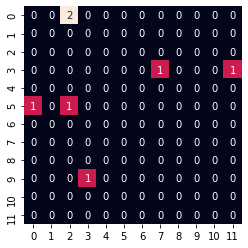

In [7]:
# Jawaban No 5

# Library/fungsi yang wajib ada
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap(L):
    return sns.heatmap(L,              # data yang diplot
                       vmin=0, vmax=2, # range nilai (value) pada data
                       square=True,    # buat plotnya kotak
                       cbar=False,     # jangan buat plot colorbar
                       annot=True      # tapi, tambahkan penanda aja
                      )

# kondisi awal lingkungan
heatmap(history[0]);

6. Animasikan simulasi automata* yang telah Anda buat di nomor 4.

 99%|█████████▉| 176/177 [05:15<00:01,  1.79s/it]


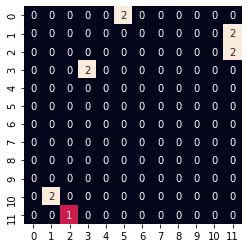

In [8]:
# Jawaban No 6

import matplotlib.animation as animation
from tqdm import tqdm   # taqaddum, menampilkan progressbar

# Menyiapkan figure, heatmap
fig = plt.figure()
ax = heatmap(history[0])

# fungsi init animasi
#   tampilkan kondisi awal lingkungan
def init():
    plt.clf()
    ax = heatmap(history[0])

# fungsi iterasi animasi
#   tampilkan lingkungan iterasi ke-i
def animate(i):
    plt.clf()
    ax = heatmap(history[i])

# fungsi inisialisasi animasi
anim = animation.FuncAnimation(
    fig, animate,               # yang dianimasikan
    init_func=init, 
    frames=tqdm(range(1, t)),   # banyaknya iterasi + tampilkan progressbar
    interval=100)               # interval waktu antar frame


# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')

anim